#  Word Frequency Classic Novels  from the website The Project Gutenberg eBook of Romeo and Juliet

The notebook demonstrates how to scrape web data, extract meaningful information, and perform basic text analysis tasks using popular Python libraries :

- requests
- BeautifulSoup
- NLTK, and Counter. 

Specifically, it focuses on the novel "Romeo and Juliet" from Project Gutenberg (https://www.gutenberg.org/ebooks/1513)

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter

In [19]:
# Getting the Romeo and Juliet HTML 
r = requests.get('https://www.gutenberg.org/cache/epub/1513/pg1513-images.html')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text


In [18]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html.parser")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 45000 and 50000
print(text[45000:50000])

say Jove laughs. O gentle Romeo,
If thou dost love, pronounce it faithfully.
Or if thou thinkest I am too quickly won,
I’ll frown and be perverse, and say thee nay,
So thou wilt woo. But else, not for the world.
In truth, fair Montague, I am too fond;
And therefore thou mayst think my ’haviour light:
But trust me, gentleman, I’ll prove more true
Than those that have more cunning to be strange.
I should have been more strange, I must confess,
But that thou overheard’st, ere I was ’ware,
My true-love passion; therefore pardon me,
And not impute this yielding to light love,
Which the dark night hath so discovered.


ROMEO.
Lady, by yonder blessed moon I vow,
That tips with silver all these fruit-tree tops,—


JULIET.
O swear not by the moon, th’inconstant moon,
That monthly changes in her circled orb,
Lest that thy love prove likewise variable.


ROMEO.
What shall I swear by?


JULIET.
Do not swear at all.
Or if thou wilt, swear by thy gracious self,
Which is the god of my idolatry,
And I

In [20]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 10 words / tokens 
tokens[0:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Romeo',
 'and',
 'Juliet',
 'by',
 'William']

In [23]:
# Create a list called words containing all tokens transformed to lower-case
words = [token.lower() for token in tokens]

words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'romeo',
 'and',
 'juliet',
 'by',
 'william']

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words("english")

sw[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
# Create a list words_ns containing all words that are in words but not in sw
words_ns = [word for word in words if word not in sw]

# Printing the first 8 words_ns to check that stop words are gone
words_ns[:8]

['project',
 'gutenberg',
 'ebook',
 'romeo',
 'juliet',
 'william',
 'shakespeare',
 'project']

In [26]:
# Initialize a Counter object from our processed list of words
count = Counter(words_ns)

# Store 10 most common words and their counts as top_ten
top_ten = count.most_common(10)

# Print the top ten words and their counts
print(top_ten)

[('romeo', 321), ('thou', 278), ('juliet', 195), ('thy', 170), ('capulet', 163), ('love', 151), ('nurse', 149), ('thee', 138), ('lady', 117), ('shall', 112), ('friar', 105), ('gutenberg', 99)]


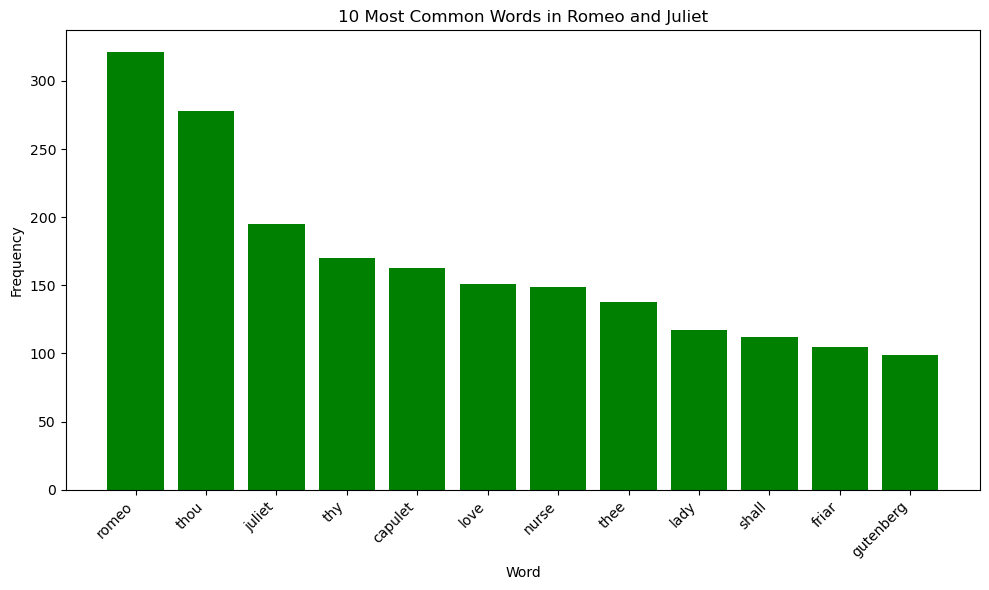

In [32]:
import matplotlib.pyplot as plt

# Retrieve words and their frequencies from top_ten
words = [pair[0] for pair in top_ten]
counts = [pair[1] for pair in top_ten]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color='green')  # Change the color to green
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('10 Most Common Words in Romeo and Juliet')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Showing the plot
plt.show()

### Counting unique words

Unique words in this context refer to each word that appears in the text of the novel "Romeo and Juliet" that you're analyzing, but appears only once. In other words, unique words are the words that do not have duplicates in the text.


In [33]:
unique_words = set(words_ns)
print("Total unique words:", len(unique_words))

Total unique words: 3897


In [34]:
# Counting total number of words
total_words = len(words_ns)
print("Total number of words:", total_words)

Total number of words: 16262
